# Gamma ray spectrometry: peak identification using a scipy routine

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d

In [24]:
isotopes = ['Am241', 'Ba133', 'Co60', 'Cs137', 'Eu152', 'Na22']
spectra = pd.DataFrame()
for isotope in isotopes:
    spectra[isotope] = pd.read_csv(
        'data_20220302/{:s}.Spe'.format(isotope), skiprows=12,
        nrows=2048, names=['counts'], dtype=float)

## Collecting peak properties

,peaks,prominences,left_bases,right_bases,widths,width_heights,left_ips,right_ips,isotope
0,17,28862.070244,0,28,10.233704,27250.752244,12.082266,22.315971,Am241
1,49,150396.955832,0,1756,15.062835,75618.333813,41.289864,56.352699,Am241


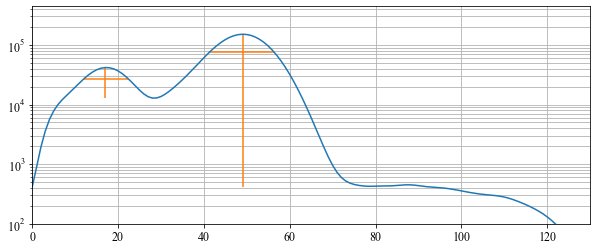

In [25]:
data = gaussian_filter1d(spectra.Am241, 2)
peaks, properties = find_peaks(
    data, prominence=2e2, width=5, rel_height=0.5)

Am241_peaks = pd.DataFrame({
    'peaks': peaks, **properties, 'isotope': np.full(peaks.size, 'Am241')
})

fig, ax = plt.subplots(figsize=(10,4))
ax.semilogy(data)
ax.vlines(x=peaks, ymin=data[peaks] - properties['prominences'],
           ymax=data[peaks], color='tab:orange')
plt.hlines(y=properties['width_heights'], xmin=properties['left_ips'],
           xmax=properties['right_ips'], color='tab:orange')
ax.set_xlim(0, 130)
ax.set_ylim(bottom=1e2)
ax.grid(True, which='both')

Am241_peaks

,peaks,prominences,left_bases,right_bases,widths,width_heights,left_ips,right_ips,isotope
0,18,17755.510231,3,1711,12.672883,10263.254036,11.217990,23.890873,Ba133
1,68,6995.016754,35,1711,17.701783,5123.870472,58.827812,76.529595,Ba133
2,141,341.187487,95,214,31.051485,774.041067,128.027122,159.078607,Ba133
3,278,252.791443,214,296,18.715502,1792.286893,268.003853,286.719355,Ba133
4,331,3510.225780,214,1711,44.577180,2230.654914,308.384853,352.962032,Ba133


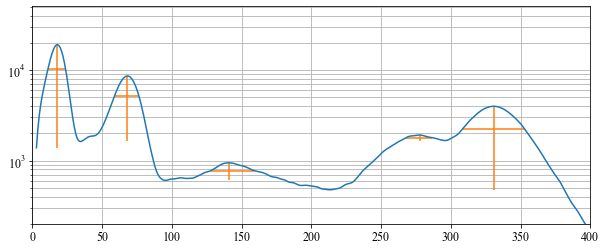

In [26]:
data = gaussian_filter1d(spectra.Ba133, 2)
data[:3] = np.nan
peaks, properties = find_peaks(
    data, prominence=2e2, width=5, rel_height=0.5)

Ba133_peaks = pd.DataFrame({
    'peaks': peaks, **properties, 'isotope': np.full(peaks.size, 'Ba133')
})

fig, ax = plt.subplots(figsize=(10,4))
ax.semilogy(data)
ax.vlines(x=peaks, ymin=data[peaks] - properties['prominences'],
           ymax=data[peaks], color='tab:orange')
plt.hlines(y=properties['width_heights'], xmin=properties['left_ips'],
           xmax=properties['right_ips'], color='tab:orange')
ax.set_xlim(0, 400)
ax.set_ylim(bottom=200)
ax.grid(True, which='both')

Ba133_peaks

,peaks,prominences,left_bases,right_bases,widths,width_heights,left_ips,right_ips,isotope
0,65,3417.581497,7,1960,23.666452,4281.506789,53.406618,77.073070,Co60
1,1086,2572.343940,991,1960,69.286524,2756.935014,1046.538315,1115.824839,Co60
2,1227,1823.218252,1155,1960,66.627240,2339.400651,1192.248906,1258.876147,Co60


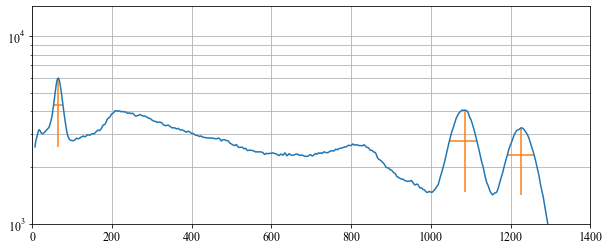

In [27]:
data = gaussian_filter1d(spectra.Co60, 2)
data[:7] = np.nan
peaks, properties = find_peaks(
    data, prominence=1500, width=5, rel_height=0.5, distance=10)

Co60_peaks = pd.DataFrame({
    'peaks': peaks, **properties, 'isotope': np.full(peaks.size, 'Co60')
})

fig, ax = plt.subplots(figsize=(10,4))
ax.semilogy(data)
ax.vlines(x=peaks, ymin=data[peaks] - properties['prominences'],
           ymax=data[peaks], color='tab:orange')
plt.hlines(y=properties['width_heights'], xmin=properties['left_ips'],
           xmax=properties['right_ips'], color='tab:orange')
ax.set_xlim(0, 1400)
ax.set_ylim(bottom=1000)
ax.grid(True, which='both')

Co60_peaks

,peaks,prominences,left_bases,right_bases,widths,width_heights,left_ips,right_ips,isotope
0,22,1984.393107,4,528,13.390699,2175.304817,14.176507,27.567206,Cs137
1,66,504.861349,38,528,23.355803,1455.190059,52.071199,75.427002,Cs137
2,615,3795.172513,528,1524,61.979787,2175.166905,583.690406,645.670193,Cs137


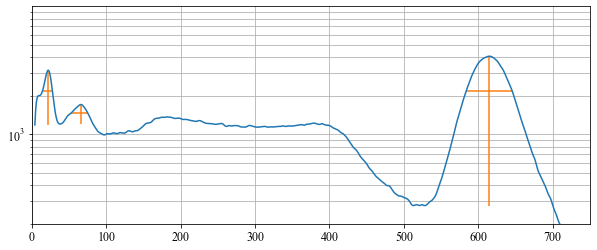

In [28]:
data = gaussian_filter1d(spectra.Cs137, 2)
data[:4] = np.nan
peaks, properties = find_peaks(
    data, prominence=500, width=5, rel_height=0.5, distance=10)

Cs137_peaks = pd.DataFrame({
    'peaks': peaks, **properties, 'isotope': np.full(peaks.size, 'Cs137')
})

fig, ax = plt.subplots(figsize=(10,4))
ax.semilogy(data)
ax.vlines(x=peaks, ymin=data[peaks] - properties['prominences'],
           ymax=data[peaks], color='tab:orange')
plt.hlines(y=properties['width_heights'], xmin=properties['left_ips'],
           xmax=properties['right_ips'], color='tab:orange')
ax.set_xlim(0, 750)
ax.set_ylim(bottom=200)
ax.grid(True, which='both')

Cs137_peaks

,peaks,prominences,left_bases,right_bases,widths,width_heights,left_ips,right_ips,isotope
0,28,36529.912705,4,1961,19.209290,23511.902763,16.602121,35.811412,Eu152
1,66,3042.276648,48,82,14.026668,9032.307413,59.465829,73.492497,Eu152
2,108,23028.890483,48,1961,20.484370,16790.480477,97.497224,117.981593,Eu152
3,224,3242.367327,175,265,30.479629,4624.821462,208.823626,239.303255,Eu152
4,319,6758.177739,265,1961,38.991398,6221.446593,299.425857,338.417255,Eu152
5,719,619.566234,599,1961,58.358632,1434.404706,692.102243,750.460875,Eu152
6,890,311.117217,842,947,50.992445,981.138870,863.571449,914.563894,Eu152
7,1015,597.390035,947,1961,63.141884,1023.033793,983.749814,1046.891698,Eu152
8,1297,410.526671,1205,1961,82.688279,367.368879,1257.109648,1339.797927,Eu152


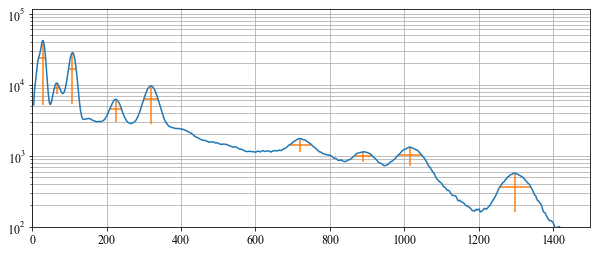

In [29]:
data = gaussian_filter1d(spectra.Eu152, 2)
data[:4] = np.nan
peaks, properties = find_peaks(
    data, prominence=300, width=5, rel_height=0.5, distance=10)

Eu152_peaks = pd.DataFrame({
    'peaks': peaks, **properties, 'isotope': np.full(peaks.size, 'Eu152')
})

fig, ax = plt.subplots(figsize=(10,4))
ax.semilogy(data)
ax.vlines(x=peaks, ymin=data[peaks] - properties['prominences'],
           ymax=data[peaks], color='tab:orange')
plt.hlines(y=properties['width_heights'], xmin=properties['left_ips'],
           xmax=properties['right_ips'], color='tab:orange')
ax.set_xlim(0, 1500)
ax.set_ylim(bottom=1e2)
ax.grid(True, which='both')

Eu152_peaks

,peaks,prominences,left_bases,right_bases,widths,width_heights,left_ips,right_ips,isotope
0,60,811.099770,6,388,32.876042,1233.813654,39.566333,72.442375,Na22
1,469,3630.276586,388,1946,53.695568,2261.236154,441.172983,494.868551,Na22
2,1168,417.882330,1057,1946,86.122679,249.008849,1128.543894,1214.666573,Na22


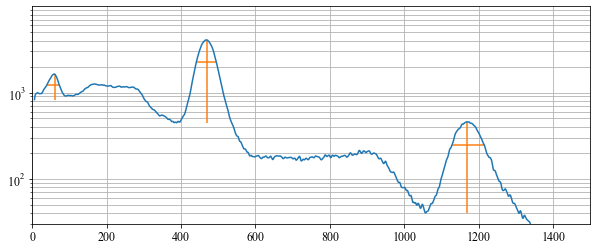

In [30]:
data = gaussian_filter1d(spectra.Na22, 2)
data[:6] = np.nan
peaks, properties = find_peaks(
    data, prominence=400, width=5, rel_height=0.5, distance=10)

Na22_peaks = pd.DataFrame({
    'peaks': peaks, **properties, 'isotope': np.full(peaks.size, 'Na22')
})

fig, ax = plt.subplots(figsize=(10,4))
ax.semilogy(data)
ax.vlines(x=peaks, ymin=data[peaks] - properties['prominences'],
           ymax=data[peaks], color='tab:orange')
plt.hlines(y=properties['width_heights'], xmin=properties['left_ips'],
           xmax=properties['right_ips'], color='tab:orange')
ax.set_xlim(0, 1500)
ax.set_ylim(bottom=30)
ax.grid(True, which='both')

Na22_peaks

## Collating peak properties

In [31]:
fit_peaks = pd.read_csv('fit_peaks.csv')
scipy_peaks = Am241_peaks.append([
    Ba133_peaks, Co60_peaks, Cs137_peaks, Eu152_peaks, Na22_peaks
]).sort_values(['isotope', 'peaks']).reset_index(drop=True)

In [32]:
# find the location of max counts around each peak
peaks_raw = np.zeros(scipy_peaks.shape[0])
for i in range(scipy_peaks.shape[0]):
    isotope = scipy_peaks.isotope[i]
    spectrum = spectra[isotope]
    left = round(scipy_peaks.left_ips[i])
    right = round(scipy_peaks.right_ips[i])
    peaks_raw[i] = left + np.argmax(spectrum[left:right])
    
mean_peaks = np.mean(
    [scipy_peaks.peaks, peaks_raw, fit_peaks.channel], axis=0)

peak_deltas = np.ceil((
    np.maximum.reduce([scipy_peaks.peaks, peaks_raw, fit_peaks.channel])
    - np.minimum.reduce([scipy_peaks.peaks, peaks_raw, fit_peaks.channel])
)/2)

mean_widths = np.mean([scipy_peaks.widths, fit_peaks.fwhm], axis=0)

width_deltas = np.ceil((
    np.maximum(scipy_peaks.widths, fit_peaks.fwhm)
    - np.minimum(scipy_peaks.widths, fit_peaks.fwhm)
)/2)

In [33]:
peaks = scipy_peaks.copy().drop([
    'prominences', 'left_bases', 'right_bases',
    'width_heights', 'left_ips', 'right_ips',
], axis=1)

peaks.insert(1, 'raw_peaks', peaks_raw)
peaks.insert(2, 'lorentzian_peaks', fit_peaks.channel)
peaks.insert(3, 'mean_peaks', mean_peaks)
peaks.insert(4, 'peak_deltas', peak_deltas)

peaks.insert(6, 'lorentzian_widths', fit_peaks.fwhm)
peaks.insert(7, 'mean_widths', mean_widths)
peaks.insert(8, 'width_deltas', width_deltas)

peaks.insert(9, 'energy', fit_peaks.energy)
peaks.insert(10, 'delta_energy', fit_peaks.delta_energy)

peaks.round(0)

,peaks,raw_peaks,lorentzian_peaks,mean_peaks,peak_deltas,widths,lorentzian_widths,mean_widths,width_deltas,energy,delta_energy,isotope
0,17,17.0,17.0,17.0,1.0,10.0,12.0,11.0,1.0,26.0,0.0,Am241
1,49,49.0,49.0,49.0,1.0,15.0,13.0,14.0,1.0,60.0,0.0,Am241
2,18,18.0,18.0,18.0,1.0,13.0,11.0,12.0,1.0,31.0,0.0,Ba133
3,68,68.0,68.0,68.0,1.0,18.0,20.0,19.0,2.0,81.0,0.0,Ba133
4,141,142.0,144.0,142.0,2.0,31.0,48.0,39.0,9.0,161.0,0.0,Ba133
5,278,277.0,270.0,275.0,4.0,19.0,53.0,36.0,18.0,303.0,0.0,Ba133
6,331,330.0,332.0,331.0,1.0,45.0,42.0,43.0,2.0,356.0,0.0,Ba133
7,65,65.0,65.0,65.0,1.0,24.0,27.0,25.0,2.0,75.0,0.0,Co60
8,1086,1078.0,1081.0,1082.0,4.0,69.0,98.0,84.0,15.0,1173.0,0.0,Co60
9,1227,1228.0,1225.0,1227.0,2.0,67.0,97.0,82.0,16.0,1332.0,0.0,Co60


In [37]:
peaks_out = peaks[[
    'isotope', 'mean_peaks', 'peak_deltas',
    'mean_widths', 'width_deltas', 'energy', 'delta_energy'
]]
peaks_out.to_csv('final_peaks.csv', index=False)
peaks_out

,isotope,mean_peaks,peak_deltas,mean_widths,width_deltas,energy,delta_energy
0,Am241,17.055242,1.0,10.949870,1.0,26.3450,0.0010
1,Am241,48.949766,1.0,14.093629,1.0,59.5370,0.0010
2,Ba133,17.873519,1.0,11.895849,1.0,30.8507,0.0005
3,Ba133,67.937757,1.0,18.821271,2.0,80.9980,0.0080
4,Ba133,142.192815,2.0,39.449379,9.0,160.6050,0.0150
5,Ba133,275.049389,4.0,35.739316,18.0,302.8510,0.0150
6,Ba133,330.952029,1.0,43.324427,2.0,356.0050,0.0170
7,Co60,65.064552,1.0,25.459021,2.0,74.9690,0.0050
8,Co60,1081.715964,4.0,83.887352,15.0,1173.2080,0.0250
9,Co60,1226.627945,2.0,82.002000,16.0,1332.4910,0.0410


## Plotting the spectra

In [11]:
import matplotlib
matplotlib.rcParams['font.family'] = ['Times New Roman']
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['mathtext.fontset'] = 'stix'

In [382]:
def lorentzian(x, position, fwhm, maximum, base):
    xprime = (x - position)/(fwhm/2)
    return maximum/(1 + xprime**2) + base

def double_lorentzian(x, *args):
    return lorentzian(x, *args[:4]) + lorentzian(x, *[*args[4:], args[3]])

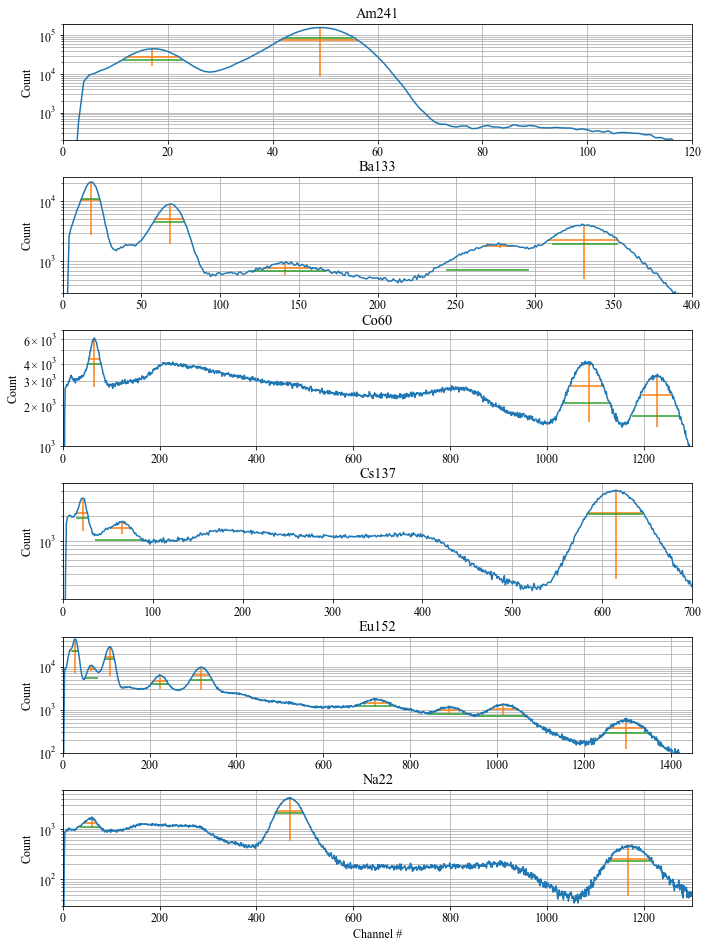

In [406]:
fig, axes = plt.subplots(6, 1, figsize=(10,20/1.5))
for ax, isotope in zip(axes, isotopes):
    ax.semilogy(spectra[isotope])
    ax.grid(True, which='both')
    ax.set(xlabel='Channel #', ylabel='Count', title=isotope)
    
    peaks = scipy_peaks.loc[scipy_peaks.isotope == isotope].reset_index(drop=True)
    ymax = spectra[isotope][peaks.peaks.to_numpy()].reset_index(drop=True)
    ax.vlines(
        x=peaks.peaks, ymin=ymax - peaks.prominences,
        ymax=ymax, color='tab:orange')
    ax.hlines(
        y=peaks.width_heights, xmin=peaks.left_ips,
        xmax=peaks.right_ips, color='tab:orange')
    
    peaks = fit_peaks.loc[fit_peaks.isotope == isotope].reset_index(drop=True)
    # ax.vlines(
    #     x=peaks.channel, ymin=peaks.base,
    #     ymax=(peaks.base + peaks.maximum), color='tab:green', linestyle='--')
    ax.hlines(
        y=(peaks.base + peaks.maximum/2), xmin=(peaks.channel - peaks.fwhm/2),
        xmax=(peaks.channel + peaks.fwhm/2), color='tab:green')
        
for ax in axes[:-1]:
    ax.set_xlabel('')
    
axes[0].set_xlim(0, 120)
axes[1].set_xlim(0, 400)
axes[2].set_xlim(0, 1300)
axes[3].set_xlim(0, 700)
axes[4].set_xlim(0, 1450)
axes[5].set_xlim(0, 1300)

axes[0].set_ylim(2e2, 2e5)
axes[1].set_ylim(3e2, 2.5e4)
axes[2].set_ylim(1e3, 7e3)
axes[3].set_ylim(2e2, 5e3)
axes[4].set_ylim(1e2, 5e4)
axes[5].set_ylim(3e1, 6e3)
fig.tight_layout(h_pad=0.1)
fig.savefig(
    'figures/all_spectra.pdf', dpi=150, facecolor='w', bbox_inches='tight',
    pad_inches=0)